In this notebook, the heart disease i.e y is getting predicted, based on some x values.
The y values are like so:
* Heart disease: The "goal" field refers to the presence of heart disease in the patient.  It is integer valued from Presence and Absence.

The x values are like so:
* Age
* Sex
* Chest pain type
* BP
* Cholesterol
* FBS over 120
* EKG results
* Max HR
* Exercise angina
* ST depression
* Slope of ST
* Number of vessels fluro
* Thallium

The dataset can be found from here: https://www.kaggle.com/datasets/rishidamarla/heart-disease-prediction?resource=download

Steps to train machine learning model workflow:

1. Getting the data ready: So, to summarize, the data is to be prepared for the machine learning algorithm. It differs from dataset to dataset on how the data is to be prepared. For example, some datasets do not have missing values in the columns, whereas some do. Where there are missing values, it is addressed by either removing the rows with missing values or doing imputation, where a theoretical data is substituted in. But if a dataset does not have missing values, the step to address missing values are not done. It is also checked if the dataset is balanced or not here in this step. 


2. Choose the right estimator/algorithm for our problems: This is done by experimentation, to know which models are best for a problem. It cannot be known beforehand, however, some key factor is to choose a classification model for a classification problem, and to choose a regression model for a regression problem. 


3. Fit the model/algorithm and use it to make predictions on our data: The model is trained on a portion of data from the dataset. It is important to use different data for training and testing, so the data is split usually its done to be 80-20. A student practices and learns through a few question sets, but the student gets graded on a different question set. The same applies to machine learning. 


4. Evaluating a model: After training the model, the model gets evaluated to see how well they performed. There are various performance metrics such as accuracy, precision etc, which will be explained later. 

5. Improve a model: The model gets experimented by tuning different hyperparameters of the model. The hyperparameters that the model performed the best on, is kept. 


6. Save and load a trained model: In order to implement the model onto an application, the model saved such as by pickle format, and is imported onto the application's code to make predictions. But in this case, this step is skipped since the model is not being imported to an application.

# The librararies that are used are imported

In [660]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import OneHotEncoder # turns into numbers
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
np.random.seed(333)

# The data is read by pandas

In [661]:
heart_disease = pd.read_csv("Heart_Disease_Prediction.csv")
heart_disease.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


# Observing how many columns can be turned to categorical columns
Machine learning algorithms work best with numerical data, and not strings. However, many real world data is categorical such as state, animal type, and customer type. In other words, categorical columns contain values that are neither numerical or continuous, but distinct values of different categories. 

Machine learning models do not interpret these types of categorical data well. So, in order to get the best results with machine learning. We transform them to numerical features.

Categorical columns are transformed like this:
<img src='./Images/cat column.png' alt='' /> 

In the cell below, I am observing which columns contain distinct values so it can be transformed to get best results. 

In [662]:
# Observing the data so the model becomes accurately trained
print("Chest Pain Type values: ")
print(f'{heart_disease["Chest pain type"].value_counts()} \n')

print("FBS over 120 values: ")
print(f'{heart_disease["FBS over 120"].value_counts()}\n')

print("EKG results values: ")
print(f'{heart_disease["EKG results"].value_counts()}\n')

print("Exercise angina values: ")
print(f'{heart_disease["Exercise angina"].value_counts()}\n')

print("Slope of ST values: ")
print(f'{heart_disease["Slope of ST"].value_counts()}\n')

print("Number of vessels fluro values: ")
print(f'{heart_disease["Number of vessels fluro"].value_counts()}\n')

print("Thallium values: ")
print(f'{heart_disease["Thallium"].value_counts()}\n')

print("Heart Disease values: ")
print(f'{heart_disease["Heart Disease"].value_counts()}\n')

Chest Pain Type values: 
4    129
3     79
2     42
1     20
Name: Chest pain type, dtype: int64 

FBS over 120 values: 
0    230
1     40
Name: FBS over 120, dtype: int64

EKG results values: 
2    137
0    131
1      2
Name: EKG results, dtype: int64

Exercise angina values: 
0    181
1     89
Name: Exercise angina, dtype: int64

Slope of ST values: 
1    130
2    122
3     18
Name: Slope of ST, dtype: int64

Number of vessels fluro values: 
0    160
1     58
2     33
3     19
Name: Number of vessels fluro, dtype: int64

Thallium values: 
3    152
7    104
6     14
Name: Thallium, dtype: int64

Heart Disease values: 
Absence     150
Presence    120
Name: Heart Disease, dtype: int64



In the cell above, the values that are present, and the count of the values in each column are present. The columns with distinct values will be transformed. 

It is also observed that the y target, which is to be predicted, heart disease or not , is in string, so the y is also to be transformed later on.

Another thing, which is observed, is that the dataset is balanced. The count of "Absence" and "Presence" are 150-120 in the target variable, y, which indicates that the dataset is pretty much balanced.
# Observing if there are any missing values
In the cell below, if there are any missing value in any of the column is being observed. The 0s indicate there are no missing values in any of the columns.

This is being checked for, because machines cannot interpret when missing values are present. If there were missing values, this could have been solved with 4 ways:
* Removal of rows: The rows containing missing values are dropped. However, if there are lots of missing values in a dataset where there is not enough data already, then imputation is preferred.
* Imputation: Imputation involves filling in the missing values with estimated or imputed values. This can be done using various techniques, such as:
 - Mean/Median/Mode Imputation: Replace missing values with the mean, median, or mode of the non-missing values in the respective column.
 - Regression Imputation: Use regression models to predict missing values based on other features in the dataset.
 - K-Nearest Neighbors (KNN) Imputation: Fill in missing values based on the values of the nearest neighbors in the feature space.
 - Multiple Imputation: Generate multiple imputed datasets and use them for analysis, incorporating the uncertainty introduced by imputation.
* Indicator Variable: Create an additional binary column that indicates whether a value is missing or not. This allows the model to capture any patterns or relationships associated with missing values as a separate feature.

Usually removal of rows, and imputation solves the problem. 

In [663]:
heart_disease.isna().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

# Columns above need to be turned to categorical, but let's split to x & y first
Feature variables or x, is the input data that the model takes to predict y or the target variable. So, in other words, the input data and the output data are being split out to test and train the model

In [664]:
x = heart_disease.drop("Heart Disease", axis=1)
transformed_y = heart_disease["Heart Disease"].map({"Absence": 0, "Presence": 1})

# Turning columns to categorical to produce better results
Previously, it was explained that it is best to transform columns with distinct values to get better results. Here, this step is being performed. 

In [665]:
# turns x, y to categorica columns on categorical_features, remainder passthrough
# transforming x first
# create an instance of one hot encoder, which is a popular method for this transformation
one_hot = OneHotEncoder()
# define the column names of x for which is to be transformed
categorical_features_x = ["Chest pain type", 
                        "FBS over 120", 
                        "EKG results",
                       "Exercise angina",
                       "Slope of ST",
                       "Number of vessels fluro",
                       "Thallium",
                       "Sex"]
# create a ColumnTransformer to apply OneHotEncoder to specific columns in x
transformer_x = ColumnTransformer([("one_hot", 
                                  one_hot, 
                                  categorical_features_x)],
                               remainder="passthrough")
# apply the transformation to x and store the transformed data in transformed_x
transformed_x = transformer_x.fit_transform(x)
transformed_x, transformed_y

(array([[0.00e+00, 0.00e+00, 0.00e+00, ..., 3.22e+02, 1.09e+02, 2.40e+00],
        [0.00e+00, 0.00e+00, 1.00e+00, ..., 5.64e+02, 1.60e+02, 1.60e+00],
        [0.00e+00, 1.00e+00, 0.00e+00, ..., 2.61e+02, 1.41e+02, 3.00e-01],
        ...,
        [0.00e+00, 1.00e+00, 0.00e+00, ..., 2.94e+02, 1.53e+02, 1.30e+00],
        [0.00e+00, 0.00e+00, 0.00e+00, ..., 1.92e+02, 1.48e+02, 4.00e-01],
        [0.00e+00, 0.00e+00, 0.00e+00, ..., 2.86e+02, 1.08e+02, 1.50e+00]]),
 0      1
 1      0
 2      1
 3      0
 4      0
       ..
 265    0
 266    0
 267    0
 268    0
 269    1
 Name: Heart Disease, Length: 270, dtype: int64)

# Split into training and test set
Separate data is used for training and unseen data is used to test and evaluate the model to see how well it does. So the data is being split for 80-20 for train and test. 

In [666]:
x_train, x_test, y_train, y_test = train_test_split(transformed_x, 
                                                    transformed_y, 
                                                    test_size=0.2)

# Training up models
6 models have been selected:
1. Extra Trees Classifier
2. K Neighbors Classifier
3. Random Forest
4. Decision Trees Classifier
5. MLP Classifier
6. Ridge

The function takes in the chosen models and spits out respective accuracies. It is observed that Ridge is the best model. 

**So, the question arises on how I am so certain that Ridge is the best model since when models are initialized, random parameters for the model are set. And due to that randomization with parameters, sometimes a different model can perform the best in some other run.**

To answer that, the train_and_score is repeating itself with the loop for each model, and spits out the average score of each model. So, it reduces that impact significantly. However, it could be that a different model, other than Ridge, performs the best in a rare case within a different environment.

In [667]:
# creating a model to train and evaluate models
def train_and_score(models, x_train, x_test, y_train, y_test):
    # ensures that the random numbers generated are reproducible
    np.random.seed(333)
    # to record in the average score of each model
    model_scores = {}
    # key, value in models dictionary
    for name, model in models.items():
        # create an empty list to store scores for each iteration
        # average is done on this later on         
        scores = []
        for _ in range(5):
            # Train the model to the training data
            model.fit(x_train, y_train)
            # Calculate the score on the test data
            score = model.score(x_test, y_test)
            # Append the score to the scores list
            scores.append(score)
        # Calculate the mean score and store it in model_scores
        model_scores[name] = np.mean(scores)
    return model_scores

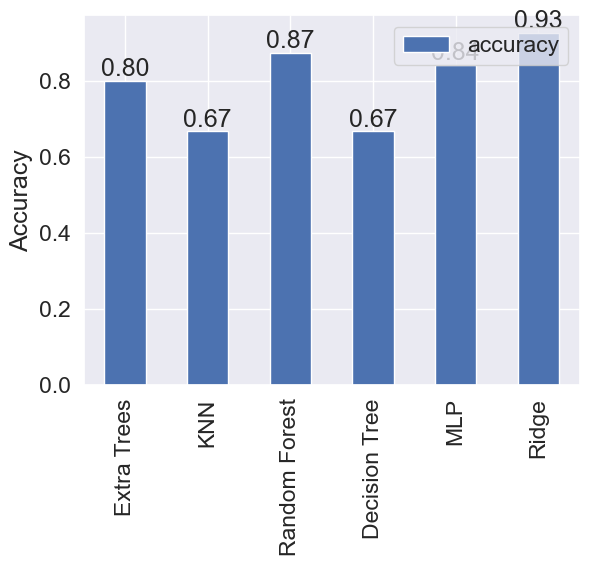

In [668]:
models = {"Extra Trees": ExtraTreesClassifier(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier(),
         "Decision Tree": DecisionTreeClassifier(criterion = 'entropy', random_state = 0),
         "MLP": MLPClassifier(),
         "Ridge": RidgeClassifier()}

ax = model_compare.T.plot.bar() # Plot a bar graph to plot the accuracies
plt.ylabel("Accuracy")  # Add a label to the y-axis
# adding in the exact accuracy on top of each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')
plt.show() # display the graph

# Choosing the best model and doing more evaluations on it
So, it has been determined that Ridge performs the best from the graph above. From now on, more evaluations will be performed with Ridge to understand, if there are any side effects. If through these more evaluations, it is observed, that it has some side effect that does not align with what is to be achieved, then some other model can be chosen, and same evaluations performed

In [669]:
np.random.seed(333)
# Instantiating again
ridge_model = RidgeClassifier()
# Training Ridge again
ridge_model.fit(x_train, y_train)

# Predicting values of y after prediction
y_preds = ridge_model.predict(x_test)

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        28
           1       0.96      0.88      0.92        26

    accuracy                           0.93        54
   macro avg       0.93      0.92      0.93        54
weighted avg       0.93      0.93      0.93        54



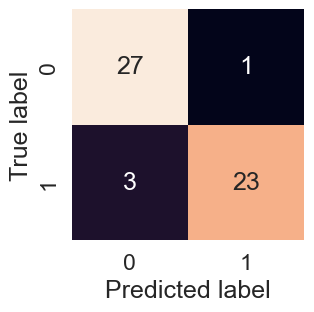

In [670]:
sns.set_theme(font_scale=1.5)
def plot_confusion_matrix(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_confusion_matrix(y_test, y_preds)
print(classification_report(y_test, y_preds))

# Confirmed: Best model is Ridge.
From the confusion matrix, and classification report, it can be observed that it does not have any side effects that the model. The side effects depend on the requirements. For example, if the side effect is that the model produces too many false positives, but the requirements mention it should not. 
# Improving the model 
Finally, lets test out different parameters on the model, and carry on futher with the best settings on the model. This is done using GridSearchCV 

In [671]:
np.random.seed(333)
# different hyperparameters for my Ridge Model
np.random.seed(42)
ridge_grid = {'alpha': [0.1, 1.0, 10.0],
              'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg'],
              'fit_intercept': [True, False],
              'normalize': [True, False],
              'class_weight': [None, 'balanced'],
              'max_iter': [100, 500, 1000]}
# setup grid hyperparameter search for ridge
ridge_improved = GridSearchCV(RidgeClassifier(), 
                                param_grid=ridge_grid, 
                                cv=5, 
                                verbose=True)
ridge_improved.fit(x_train, y_train)


Fitting 5 folds for each of 360 candidates, totalling 1800 fits


/Users/nafi/opt/miniconda3/envs/env_from_file/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/Users/nafi/opt/miniconda3/envs/env_from_file/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler

/Users/nafi/opt/miniconda3/envs/env_from_file/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/Users/nafi/opt/miniconda3/envs/env_from_file/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler

/Users/nafi/opt/miniconda3/envs/env_from_file/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/Users/nafi/opt/miniconda3/envs/env_from_file/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler

/Users/nafi/opt/miniconda3/envs/env_from_file/lib/python3.10/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/nafi/opt/miniconda3/envs/env_from_file/lib/python3.10/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/nafi/opt/miniconda3/envs/env_from_file/lib/python3.10/site-packages/sklearn/linear_model/_bas

/Users/nafi/opt/miniconda3/envs/env_from_file/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/Users/nafi/opt/miniconda3/envs/env_from_file/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler

/Users/nafi/opt/miniconda3/envs/env_from_file/lib/python3.10/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/nafi/opt/miniconda3/envs/env_from_file/lib/python3.10/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/nafi/opt/miniconda3/envs/env_from_file/lib/python3.10/site-packages/sklearn/linear_model/_bas

/Users/nafi/opt/miniconda3/envs/env_from_file/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/Users/nafi/opt/miniconda3/envs/env_from_file/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler

GridSearchCV(cv=5, estimator=RidgeClassifier(),
             param_grid={'alpha': [0.1, 1.0, 10.0],
                         'class_weight': [None, 'balanced'],
                         'fit_intercept': [True, False],
                         'max_iter': [100, 500, 1000],
                         'normalize': [True, False],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg']},
             verbose=True)

In [672]:
print(f"Improved model score with Grid Search CV: {ridge_improved.score(x_test, y_test)}")
y_preds = ridge_model.predict(x_test)
print(f"Model score with default score: {accuracy_score(y_test, y_preds)}")

Improved model score with Grid Search CV: 0.9074074074074074
Model score with default score: 0.9259259259259259


Turns out the model performs the best at default settings. So, let's just continue with the default instead to make the final predictions

In [673]:
# Define the two arrays
array1 = np.array(y_test)
array2 = np.array(y_preds)

# Convert the arrays to Pandas Series
series1 = pd.Series(array1, name="Actual Values")
series2 = pd.Series(array2, name="Predictions")

# Combine the Series into a single DataFrame
df = pd.concat([series1, series2], axis=1)

print(df)

    Actual Values  Predictions
0               1            1
1               1            1
2               0            0
3               1            1
4               1            1
5               0            0
6               0            0
7               0            0
8               0            0
9               1            1
10              0            0
11              1            1
12              0            0
13              1            1
14              0            0
15              1            1
16              0            0
17              1            1
18              0            0
19              0            0
20              0            0
21              0            0
22              1            1
23              1            1
24              1            0
25              0            0
26              1            1
27              1            1
28              0            0
29              0            0
30              0            0
31      